### Import Packages

In [2]:
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import pandas as pd
from keras.utils import to_categorical

### Load Test Dataframe

In [3]:
df = pd.read_csv('Test.csv')

### Generate Images From Directory

In [4]:
# Path Directory
train_data_dir = '../Mod 6 Project/Data/Train'
test_data_dir = '../Mod 6 Project/Data/Test'

In [5]:
# Train batches
train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    train_data_dir,
                    target_size=(64,64),
                    classes=[str(i) for i in np.arange(43)],
                    batch_size=39209)
# Test batches
test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    test_data_dir,
                    target_size=(64,64),
                    classes=[],
                    batch_size=12630)

Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 1 classes.


In [6]:
# Extract train/test batch sequences
train_data, train_labels = next(train_batches)
test_data, test_labels = next(test_batches)

In [7]:
print('test data: {}'.format(test_data.shape))
print('test label: {}'.format(test_labels.shape))
print('train data: {}'.format(train_data.shape))
print('train label: {}'.format(train_labels.shape))

test data: (12630, 64, 64, 3)
test label: (12630, 1)
train data: (39209, 64, 64, 3)
train label: (39209, 43)


## Reshaping Train and Test Labels from 1 to 43 Columns

In [8]:
# train labels
train_labels = np.array([list(img).index(1.0) for img in train_labels])

In [9]:
# test labels
path_test = [int(i.replace('Test/','').replace('.png','')) for i in list(df['Path'])] # remove 'Test/','.png'
id_test = list(df['ClassId'])
path_id = dict(zip(path_test, id_test)) # tuple of path, id
labels = [path_id[batch] for batch in list(test_batches.index_array)]
test_labels = np.array(labels)

In [10]:
print('test label: {}'.format(test_labels.shape))
print('train label: {}'.format(train_labels.shape))

test label: (12630,)
train label: (39209,)


In [11]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
print('test label: {}'.format(test_labels.shape))
print('train label: {}'.format(train_labels.shape))

test label: (12630, 43)
train label: (39209, 43)


### C-Neural Network Architecture

In [13]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3))) # ADDED PADDING
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [15]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validation 

In [17]:
x_val = train_data[:3000]
partial_x_train = train_data[3000:]

y_val = train_labels[:3000]
partial_y_train = train_labels[3000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=750,
                    validation_data=(x_val, y_val))

Train on 36209 samples, validate on 3000 samples
Epoch 1/10
36209/36209 [==============================] - 146s 4ms/step - loss: 0.2039 - accuracy: 0.9425 - val_loss: 0.4151 - val_accuracy: 0.9660
Epoch 2/10
36209/36209 [==============================] - 148s 4ms/step - loss: 0.1453 - accuracy: 0.9588 - val_loss: 0.3605 - val_accuracy: 0.9643
Epoch 3/10
36209/36209 [==============================] - 148s 4ms/step - loss: 0.0963 - accuracy: 0.9715 - val_loss: 0.2203 - val_accuracy: 0.9753
Epoch 4/10
36209/36209 [==============================] - 147s 4ms/step - loss: 0.0833 - accuracy: 0.9766 - val_loss: 0.5058 - val_accuracy: 0.9500
Epoch 5/10
36209/36209 [==============================] - 150s 4ms/step - loss: 0.0603 - accuracy: 0.9820 - val_loss: 0.1990 - val_accuracy: 0.9840
Epoch 6/10
36209/36209 [==============================] - 167s 5ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.1704 - val_accuracy: 0.9657
Epoch 7/10
36209/36209 [==============================] - 159s 

### Model Evaluations

In [25]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy: {}'.format(test_acc))

12630/12630 [==============================] - 13s 1ms/step
Test accuracy: 0.9078384637832642


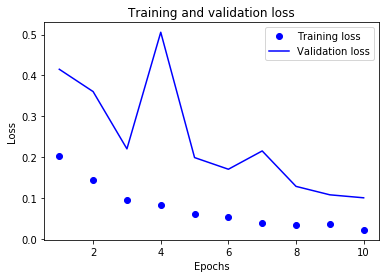

In [26]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

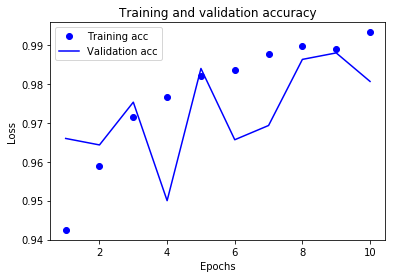

In [27]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

predictions = model.predict(test_data)
predictions = np.around(predictions)
f1_score = f1_score(test_labels, predictions, average='micro')
print('f1 score: {}'.format(f1_score))

f1 score: 0.912292222450236


In [ ]:
# show the confusion matrix of our predictions
# compute predictions
# predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
# y_test = validation_generator.classes
y_test= test_labels
# class_names = validation_generator.class_indices.keys()

# from sklearn.metrics import confusion_matrix
# import itertools

# def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     plt.figure(figsize=(10,10))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
# #     tick_marks = np.arange(len(classes))
# #     plt.xticks(tick_marks, classes, rotation=45)
# #     plt.yticks(tick_marks, classes)

#     fmt = '.2f'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.tight_layout()
    
# # compute confusion matrix
# cnf_matrix = confusion_matrix(y_test, y_pred)
# np.set_printoptions(precision=2)

# # plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
# plt.show()

In [ ]:
epochs = range(1, 9)
loss = history.history['loss']
acc = history.history['accuracy']
import matplotlib.pyplot as plt

plt.plot(epochs, loss, '--', label='Loss')
plt.plot(epochs, acc, '-', label='Accuracy')

# "bo" is for "blue dot"
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 10 epochs, 256 batch size w/o regularuzer

In [29]:
from keras.models import load_model
model.save('CNN_Drop_Bias_750BS+validation.h5')
my_model = load_model('CNN_Drop_Bias_750BS+validation.h5')

my_prediction = my_model.predict(test_data)